In [1]:
# Import
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from adjustText import adjust_text
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from tabulate import tabulate

In [2]:
# csv file
file = "data/MLB_stats.csv"
file2 = "data/data.csv"

file11 = pd.read_csv(file)
file12 = pd.read_csv(file)

df = pd.merge(file11, file12, how='outer')

pd.read_csv(file)

df = df.drop(columns=["year"])

df.head()

,"last_name, first_name",player_id,pa,k_percent,bb_percent,woba,xwoba,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,z_swing_percent,oz_swing_percent,oz_contact_percent,out_zone_percent,whiff_percent,swing_percent
0,"Abbott, Andrew",671096,499,21.0,7.0,0.276,0.297,33.0,7.3,32.4,77.149288,93.114612,69.6,29.8,63.5,49.1,23.9,50.1
1,"Alcantara, Sandy",645261,557,17.4,8.6,0.328,0.353,34.8,8.6,44.0,79.739319,94.941420,66.8,28.1,61.2,48.4,19.5,48.0
2,"Allen, Logan",671106,510,18.0,9.4,0.323,0.340,32.9,9.6,37.0,77.094059,94.068055,65.7,23.3,66.0,50.8,20.3,44.2
3,"Anderson, Tyler",542881,557,17.6,9.3,0.345,0.347,40.8,10.1,35.6,76.272886,93.761269,69.4,29.0,57.5,51.1,25.2,48.8
4,"Bassitt, Chris",605135,600,22.0,6.5,0.332,0.327,34.1,8.6,35.5,75.114609,93.771761,67.2,26.0,63.3,47.5,22.7,47.6


In [3]:
df.columns

Index(['last_name, first_name', 'player_id', 'pa', 'k_percent', 'bb_percent',
       'woba', 'xwoba', 'sweet_spot_percent', 'barrel_batted_rate',
       'hard_hit_percent', 'avg_best_speed', 'avg_hyper_speed',
       'z_swing_percent', 'oz_swing_percent', 'oz_contact_percent',
       'out_zone_percent', 'whiff_percent', 'swing_percent'],
      dtype='object')

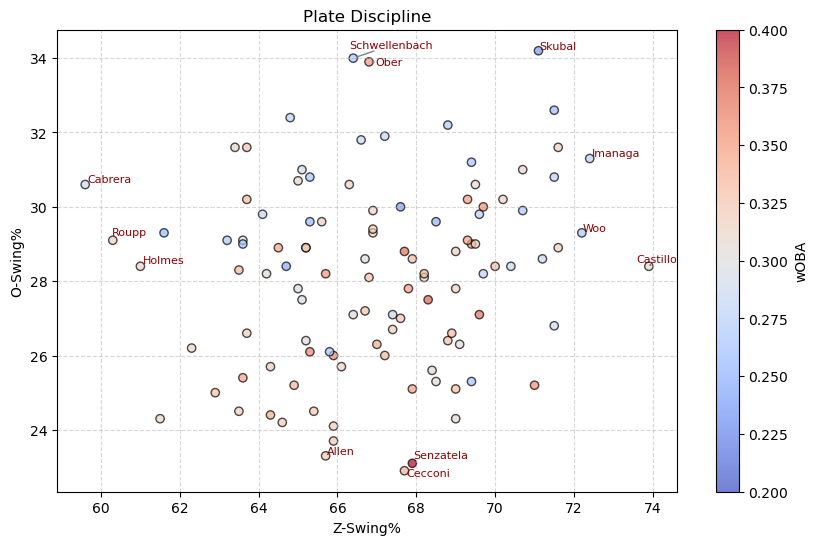

In [ ]:
plt.figure(figsize=(10,6))

scatter = plt.scatter(
    df['z_swing_percent'], 
    df['oz_swing_percent'], 
    c=df['woba'], cmap='coolwarm', alpha=0.7, edgecolor="k",
    vmin=0.200, vmax=0.4
)

plt.colorbar(label="wOBA")
plt.xlabel("Z-Swing%")
plt.ylabel("O-Swing%")
plt.title("Plate Discipline")
plt.grid(True, linestyle="--", alpha=0.5)

# Find extreme value players
high_oz = df.nlargest(3, 'oz_swing_percent')
low_oz  = df.nsmallest(3, 'oz_swing_percent')
high_z  = df.nlargest(3, 'z_swing_percent')
low_z   = df.nsmallest(3, 'z_swing_percent')
extremes = pd.concat([high_oz, low_oz, high_z, low_z]).drop_duplicates()

# Create text objects
texts = []
for _, row in extremes.iterrows():
    last_name = row['last_name, first_name'].split(',')[0]
    texts.append(
        plt.text(row['z_swing_percent'], row['oz_swing_percent'], last_name, fontsize=8, color="darkred")
    )

# Adjust labels to minimize overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

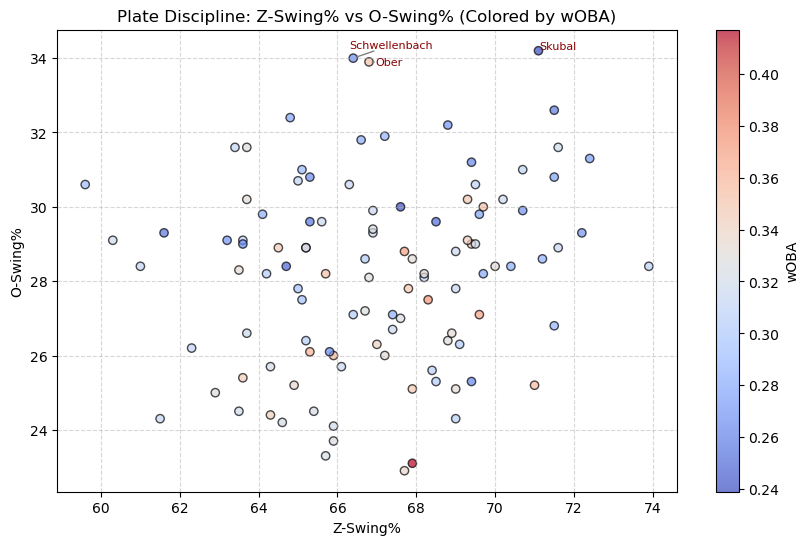

In [ ]:
plt.figure(figsize=(10,6))

scatter = plt.scatter(
    df['z_swing_percent'], 
    df['oz_swing_percent'], 
    c=df['woba'], cmap='coolwarm', alpha=0.7, edgecolor="k"
)
plt.colorbar(label="wOBA")
plt.xlabel("Z-Swing%")
plt.ylabel("O-Swing%")
plt.title("Plate Discipline: Z-Swing% vs O-Swing% (Colored by wOBA)")
plt.grid(True, linestyle="--", alpha=0.5)

# Find extreme players
high_oz = df.nlargest(3, 'oz_swing_percent')
low_oz  = df.nsmallest(0, 'oz_swing_percent')
high_z  = df.nlargest(0, 'z_swing_percent')
low_z   = df.nsmallest(0, 'z_swing_percent')
extremes = pd.concat([high_oz, low_oz, high_z, low_z]).drop_duplicates()

# Create text objects
texts = []
for _, row in extremes.iterrows():
    last_name = row['last_name, first_name'].split(',')[0]
    texts.append(
        plt.text(row['z_swing_percent'], row['oz_swing_percent'], last_name, fontsize=8, color="darkred")
    )

# Adjust labels to minimize overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()


In [ ]:
# Filter
players = df[df['last_name, first_name'].str.contains('Schwellenbach|Ober', case=False)]

# Select key stats for comparison
stats_to_compare = [
    'pa', 'k_percent', 'bb_percent', 'woba', 'xwoba',
    'sweet_spot_percent', 'barrel_batted_rate', 'hard_hit_percent',
    'avg_best_speed', 'avg_hyper_speed',
    'z_swing_percent', 'oz_swing_percent', 'oz_contact_percent',
    'out_zone_percent', 'whiff_percent', 'swing_percent'
]

comparison = players[stats_to_compare].copy()

# Add player names
comparison.index = players['last_name, first_name'].str.split(',').str[0]

# Reorder
comparison = comparison.loc[['Schwellenbach', 'Ober']]

# Calculate difference: Ober - Schwellenbach
difference = comparison.loc['Schwellenbach'] - comparison.loc['Ober']
difference = difference.to_frame(name='Difference (Schwellenbach - Ober)')
diff_table = pd.concat([comparison, difference.T])
diff_table

,pa,k_percent,bb_percent,woba,xwoba,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,z_swing_percent,oz_swing_percent,oz_contact_percent,out_zone_percent,whiff_percent,swing_percent
Schwellenbach,434.0,24.9,4.1,0.266,0.301,34.3,7.5,41.5,76.928234,94.493623,66.4,34.0,50.6,45.1,28.3,51.8
Ober,470.0,18.3,5.1,0.352,0.335,33.4,10.7,39.6,78.353962,94.376389,66.8,33.9,58.7,48.4,23.9,50.9
Difference (Schwellenbach - Ober),-36.0,6.6,-1.0,-0.086,-0.034,0.9,-3.2,1.9,-1.425728,0.117234,-0.4,0.1,-8.1,-3.3,4.4,0.9


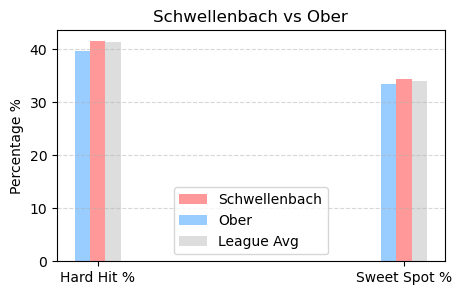

In [ ]:
# Filter
players = df[df['last_name, first_name'].str.contains('Schwellenbach|Ober', case=False)].copy()
players.index = players['last_name, first_name'].str.split(',').str[0]

# stats to compare
metrics = ['hard_hit_percent', 'sweet_spot_percent']

# Prepare data
values_ober = players.loc['Ober', metrics].values
values_schw = players.loc['Schwellenbach', metrics].values

# Calculate league averages
league_avg = df[metrics].mean().values

x = np.arange(len(metrics))
width = 0.05  

plt.figure(figsize=(5,3))

# Plot bars: Schwellenbach, Ober, League
plt.bar(x, values_schw, width, label='Schwellenbach', color='#FF9999')        # middle
plt.bar(x - width, values_ober, width, label='Ober', color='#99CCFF')          # left
plt.bar(x + width, league_avg, width, label='League Avg', color='#DDDDDD')     # right

# Labels
plt.xticks(x, ['Hard Hit %', 'Sweet Spot %'])
plt.ylabel('Percentage %')
plt.title('Schwellenbach vs Ober')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


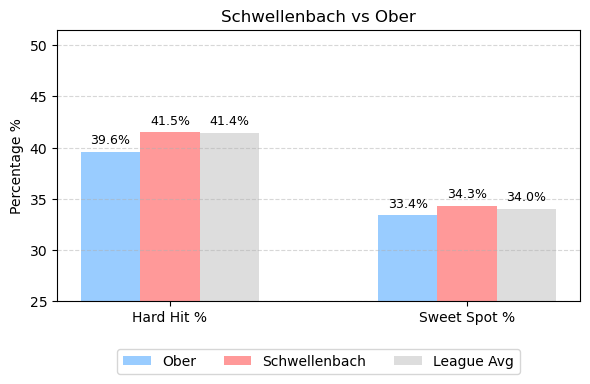

In [ ]:
# Filter
players = df[df['last_name, first_name'].str.contains('Schwellenbach|Ober', case=False)].copy()
players.index = players['last_name, first_name'].str.split(',').str[0]

# Stats to compare
metrics = ['hard_hit_percent', 'sweet_spot_percent']

# Prepare data
values_ober = players.loc['Ober', metrics].values
values_schw = players.loc['Schwellenbach', metrics].values
league_avg = df[metrics].mean().values

x = np.arange(len(metrics))
width = 0.2

plt.figure(figsize=(6,4))

# Plot bars
bars_ober = plt.bar(x - width, values_ober, width, label='Ober', color='#99CCFF')          # left
bars_schw = plt.bar(x, values_schw, width, label='Schwellenbach', color='#FF9999')        # middle
bars_league = plt.bar(x + width, league_avg, width, label='League Avg', color='#DDDDDD')   # right

# % labels above each bar, offset to avoid overlap
for i in range(len(metrics)):
    plt.text(x[i] - width, values_ober[i] + 0.5, f'{values_ober[i]:.1f}%', ha='center', va='bottom', fontsize=9)
    plt.text(x[i], values_schw[i] + 0.5, f'{values_schw[i]:.1f}%', ha='center', va='bottom', fontsize=9)
    plt.text(x[i] + width, league_avg[i] + 0.5, f'{league_avg[i]:.1f}%', ha='center', va='bottom', fontsize=9)

# Labels
plt.xticks(x, ['Hard Hit %', 'Sweet Spot %'])
plt.ylabel('Percentage %')
plt.title('Schwellenbach vs Ober')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Start y-axis at 25% for better visual comparison
plt.ylim(25, max(max(values_ober), max(values_schw), max(league_avg)) + 10)

# Center legend on bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
plt.show()


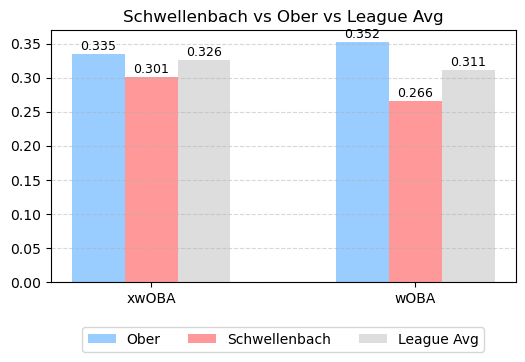

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter
players = df[df['last_name, first_name'].str.contains('Schwellenbach|Ober', case=False)].copy()
players.index = players['last_name, first_name'].str.split(',').str[0]

# Stats to compare
metrics = ['xwoba', 'woba']

# Prepare data
values_ober = players.loc['Ober', metrics].values
values_schw = players.loc['Schwellenbach', metrics].values
league_avg = df[metrics].mean().values

x = np.arange(len(metrics))
width = 0.2

plt.figure(figsize=(6,4))

# Plot bars
bars_ober = plt.bar(x - width, values_ober, width, label='Ober', color='#99CCFF')
bars_schw = plt.bar(x, values_schw, width, label='Schwellenbach', color='#FF9999')
bars_league = plt.bar(x + width, league_avg, width, label='League Avg', color='#DDDDDD')

# Add numeric labels above each bar
for i in range(len(metrics)):
    plt.text(x[i] - width, values_ober[i] + 0.002, f'{values_ober[i]:.3f}', ha='center', va='bottom', fontsize=9)
    plt.text(x[i], values_schw[i] + 0.002, f'{values_schw[i]:.3f}', ha='center', va='bottom', fontsize=9)
    plt.text(x[i] + width, league_avg[i] + 0.002, f'{league_avg[i]:.3f}', ha='center', va='bottom', fontsize=9)

# Labels
plt.xticks(x, ['xwOBA', 'wOBA'])
plt.title('Schwellenbach vs Ober vs League Avg')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Center legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Adjust layout to avoid cutting off legend
plt.subplots_adjust(bottom=0.25)

plt.show()


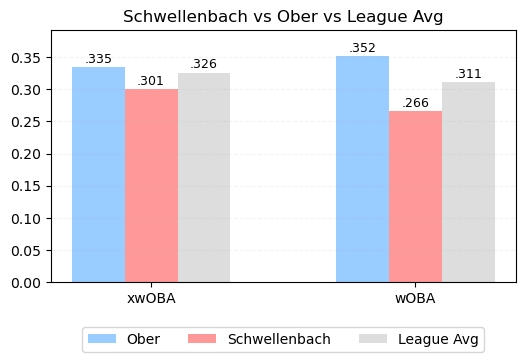

In [ ]:
# Filter
players = df[df['last_name, first_name'].str.contains('Schwellenbach|Ober', case=False)].copy()
players.index = players['last_name, first_name'].str.split(',').str[0]

# Stats to compare
metrics = ['xwoba', 'woba']

# Prepare data
values_ober = players.loc['Ober', metrics].values
values_schw = players.loc['Schwellenbach', metrics].values
league_avg = df[metrics].mean().values

x = np.arange(len(metrics))
width = 0.2

plt.figure(figsize=(6,4))

# Plot bars
bars_ober = plt.bar(x - width, values_ober, width, label='Ober', color='#99CCFF')
bars_schw = plt.bar(x, values_schw, width, label='Schwellenbach', color='#FF9999')
bars_league = plt.bar(x + width, league_avg, width, label='League Avg', color='#DDDDDD')

# Add labels
for i in range(len(metrics)):
    plt.text(x[i] - width, values_ober[i] + 0.002, f'{values_ober[i]:.3f}'.lstrip('0'), ha='center', va='bottom', fontsize=9)
    plt.text(x[i], values_schw[i] + 0.002, f'{values_schw[i]:.3f}'.lstrip('0'), ha='center', va='bottom', fontsize=9)
    plt.text(x[i] + width, league_avg[i] + 0.002, f'{league_avg[i]:.3f}'.lstrip('0'), ha='center', va='bottom', fontsize=9)

# Labels
plt.xticks(x, ['xwOBA', 'wOBA'])
plt.title('Schwellenbach vs Ober vs League Avg')
plt.grid(axis='y', linestyle='--', alpha=0.15)

# Center legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Y-axis raised above the tallest bar for label space
max_height = max(max(values_ober), max(values_schw), max(league_avg))
plt.ylim(0, max_height + 0.04)  # add buffer for top labels

# Adjust layout to avoid cutting off legend
plt.subplots_adjust(bottom=0.25)

plt.show()


In [ ]:
# saving csv file
df.to_csv("merged_dataset.csv", index=False)